In [38]:
import numpy as np
import datetime
import pandas as pd
import json
import matplotlib.pyplot as plt

# The Purpose of this Notebook:
Compare the lengths of decompositions output by GER, SER 1 and SER 2.

Load the data for the lengths of decompositions output by GER, SER 1, SER 2.

In [3]:
GER_path = './arranged_data/GER_opt_lengths_pdSeries.pkl'
SER1_path = './expt_results/SER1_decom_lengths.json'
SER2_path = './expt_results/SER2_decom_lengths.json'
    
GER_decom_lengths_pdSeries = pd.read_pickle(GER_path)

with open(SER1_path, 'r') as f2:
    SER1_decom_lengths_list = json.load(f2)

with open(SER2_path, 'r') as f3:
    SER2_decom_lengths_list = json.load(f3)

In [8]:
SER1_decom_lengths_pdSeries = pd.Series(SER1_decom_lengths_list)
SER2_decom_lengths_pdSeries = pd.Series(SER2_decom_lengths_list)

Create and save a DataFrame of Lengths of Decompositions Found by GER, SER 1, SER 2.

In [9]:
algos_length_pdSeries = [GER_decom_lengths_pdSeries, 
                         SER1_decom_lengths_pdSeries, SER2_decom_lengths_pdSeries]
df_keys = ['GER_opt', 'SER 1', 'SER 2']

pddf_decomposition_lengths_of_algos = pd.concat(algos_length_pdSeries, axis='columns', keys=df_keys)

In [10]:
all_algos_filepath = './arranged_data/pddf_decom_lengths_of_algos.pkl'
pddf_decomposition_lengths_of_algos.to_pickle(all_algos_filepath)

In [11]:
pddf_decomposition_lengths_of_algos

,GER_opt,SER 1,SER 2
0,104,387,110
1,105,372,109
2,106,385,107
3,107,377,111
4,107,381,113
...,...,...,...
1995,112,406,113
1996,113,392,118
1997,112,392,118
1998,114,400,118


Ranking of the Performance of GER, SER 1, SER 2

In [12]:
pddf_algos_length_ranking = pddf_decomposition_lengths_of_algos.rank(axis='columns', method='dense')

In [13]:
ranking_filepath = './arranged_data/pddf_algos_length_ranking.pkl'
pddf_algos_length_ranking.to_pickle(ranking_filepath)

In [14]:
pddf_algos_length_ranking

,GER_opt,SER 1,SER 2
0,1.0,3.0,2.0
1,1.0,3.0,2.0
2,1.0,3.0,2.0
3,1.0,3.0,2.0
4,1.0,3.0,2.0
...,...,...,...
1995,1.0,3.0,2.0
1996,1.0,3.0,2.0
1997,1.0,3.0,2.0
1998,1.0,3.0,2.0


Select the rows of pddf_algos_length_ranking (DataFrame) such that GER strictly beats SER 1, SER 2.

In [15]:
GER_strictly_better_condition = (pddf_algos_length_ranking['GER_opt'] == 1.0) & \
                                (pddf_algos_length_ranking['SER 1'] > 1.0) & \
                                (pddf_algos_length_ranking['SER 2'] > 1.0)

In [16]:
pddf_GER_strictly_beats = pddf_algos_length_ranking[GER_strictly_better_condition]

In [17]:
GER_strictly_filepath = './arranged_data/pddf_GER_strictly_beats.pkl'
pddf_GER_strictly_beats.to_pickle(GER_strictly_filepath)

In [19]:
pddf_GER_strictly_beats

,GER_opt,SER 1,SER 2
0,1.0,3.0,2.0
1,1.0,3.0,2.0
2,1.0,3.0,2.0
3,1.0,3.0,2.0
4,1.0,3.0,2.0
...,...,...,...
1995,1.0,3.0,2.0
1996,1.0,3.0,2.0
1997,1.0,3.0,2.0
1998,1.0,3.0,2.0


The following line of code shows that on 1782 of the $32 \times 32$ random $p$-TPMs, the performance of GER is strictly better than the performance of SER 1 and SER 2 in terms of the lengths of the output decompositions.

In [20]:
pddf_GER_strictly_beats.shape

(1782, 3)

Select the rows of pddf_algos_length_ranking (DataFrame) such that SER 2 strictly beats GER, SER 1.

In [21]:
SER2_strictly_better_condition = (pddf_algos_length_ranking['GER_opt'] > 1.0) & \
                                 (pddf_algos_length_ranking['SER 1'] > 1.0) & \
                                 (pddf_algos_length_ranking['SER 2'] == 1.0)

In [22]:
pddf_SER2_strictly_beats = pddf_algos_length_ranking[SER2_strictly_better_condition]

In [23]:
SER2_strictly_filepath = './arranged_data/pddf_SER2_strictly_beats.pkl'
pddf_SER2_strictly_beats.to_pickle(SER2_strictly_filepath)

In [25]:
pddf_SER2_strictly_beats

,GER_opt,SER 1,SER 2
79,2.0,3.0,1.0
174,2.0,3.0,1.0
221,2.0,3.0,1.0
251,2.0,3.0,1.0
364,2.0,3.0,1.0
...,...,...,...
1959,2.0,3.0,1.0
1960,2.0,3.0,1.0
1970,2.0,3.0,1.0
1977,2.0,3.0,1.0


The following line of code shows that on 124 of the $32 \times 32$ random $p$-TPMs, the performance of SER 2 is strictly better than the performance of SER 1 and GER in terms of the lengths of the output decompositions.

In [26]:
pddf_SER2_strictly_beats.shape

(124, 3)

Select the rows of pddf_algos_length_ranking (DataFrame) such that GER and SER 2 simultaneously give the best performance in terms of the lengths of the output decompositions.

In [28]:
GER_SER_2_best_condition = (pddf_algos_length_ranking['GER_opt'] == 1.0) & \
                           (pddf_algos_length_ranking['SER 2'] == 1.0)

In [29]:
pddf_GER_SER_2_best = pddf_algos_length_ranking[GER_SER_2_best_condition]

In [30]:
simultaneous_filepath = './arranged_data/pddf_GER_SER2_best.pkl'
pddf_GER_SER_2_best.to_pickle(simultaneous_filepath)

In [32]:
pddf_GER_SER_2_best

,GER_opt,SER 1,SER 2
87,1.0,2.0,1.0
100,1.0,2.0,1.0
110,1.0,2.0,1.0
124,1.0,2.0,1.0
177,1.0,2.0,1.0
...,...,...,...
1922,1.0,2.0,1.0
1958,1.0,2.0,1.0
1961,1.0,2.0,1.0
1971,1.0,2.0,1.0


The following line of code shows that on 94 of the $32 \times 32$ random $p$-TPMs, GER and SER 2 simultaneously give the best performance in terms of the lengths of the output decompositions.

Note that 1782 + 124 + 94 = 2000.

In [33]:
pddf_GER_SER_2_best.shape

(94, 3)

Compute the mean of the lengths of decompositions output by GER, SER 1 and SER 2.

In [34]:
pddf_decomposition_lengths_of_algos.mean()

GER_opt    109.5230
SER 1      387.9455
SER 2      113.9510
dtype: float64

## Visualize the performance of SDS2G, SER 1, SER 2, GER on a line plot.

In [35]:
GER_decom_lengths_list = GER_decom_lengths_pdSeries.to_list()

In [36]:
dim32_pTPMs_labels = list(range(4001, 6001))

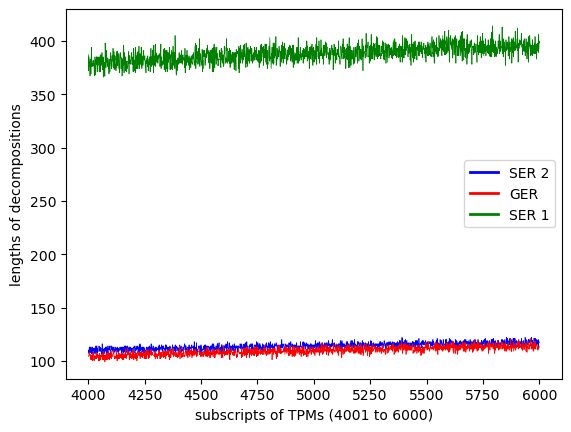

In [43]:
plt.plot(dim32_pTPMs_labels, SER2_decom_lengths_list, 'b', label='SER 2', linewidth='0.5')
plt.plot(dim32_pTPMs_labels, GER_decom_lengths_list, 'r', label='GER', linewidth='0.5')
plt.plot(dim32_pTPMs_labels, SER1_decom_lengths_list, 'g', label='SER 1', linewidth='0.5')

leg = plt.legend()
plt.xlabel('subscripts of TPMs (4001 to 6000)')
plt.ylabel('lengths of decompositions')

for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)

plt.savefig("Figure_1.jpg")